# Lab 7 Excercises part 2

----

## Exercise 1 - intercept and slope

1. Have a look at the cars dataset: ?cars

2. plot(y ~ x, d) produces the plot of y vs x where y and x are in the data frame or matrix d. Plot dist vs speed using this function.

3. The same syntax can be used to fit a simple linear model, just replace the plot function with the lm (linear model) function. Store the result in m1 and obtain the summary of m1 by using the summary function.

4. Create a new stan script called slr.stan (slr stands for simple linear regression) and define in it this linear model:

$$y = a0 + a1 * x + epsilon$$


$$epsilon - Normal(0, sigma)$$

but without introducing an explicit error term (epsilon). To get rid of the error term you have to represent y as a (normal) distribution, not as a sum of (random) variables. Remember that you need at least three blocks in your Stan script, i.e., the data, the parameters, and the model block. Note that there are three parameters in this model - it is best if x and y are vectors, sigma must have an appropriate lower bound, and a0 and a1 should have (independent) normal priors. This time add a normal prior on sigma too. The mean of this prior should be 0 and the standard deviation should be close to the standard deviation of the errors that you think is likely. If the sigma parameter has an appropriate lower bound the prior defined in this way will be interpreted by Stan as a half-normal distribution.

5. Fit the Bayesian linear model to the data in the cars dataset. Store the fitted model in m2. First, make sure that Rhat and n_eff are acceptable and then compare the Bayesian and the frequentist results in terms of point and interval estimates.

In [ ]:
library("rstan")
library(rstanarm)

options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

In [7]:
head(cars)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


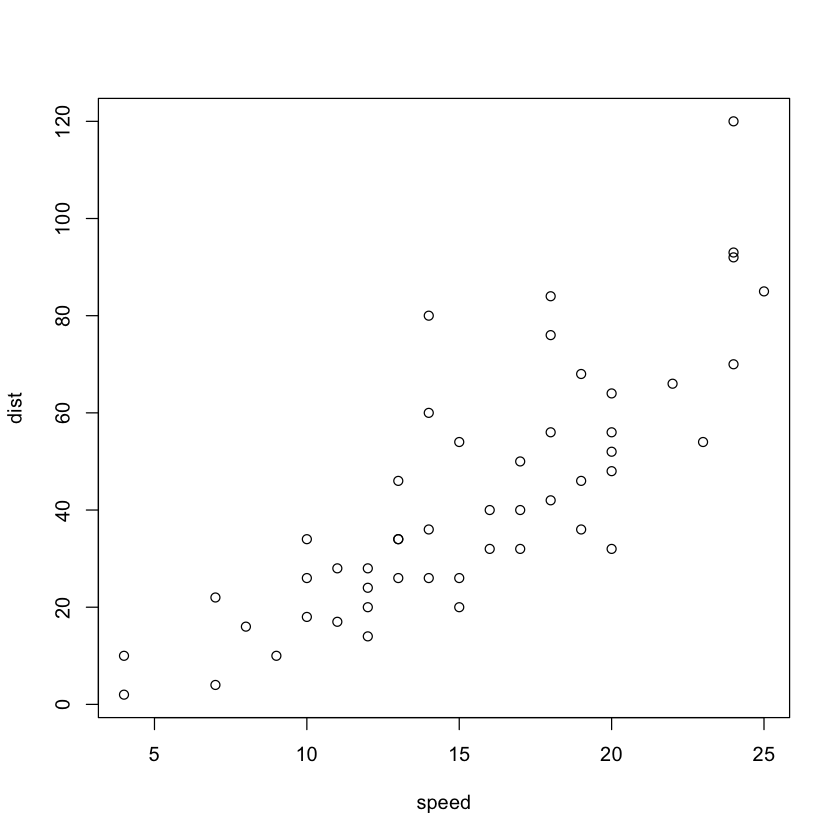

In [8]:
par(bg = 'white')
plot(dist ~ speed, cars)

In [9]:
lm_model = lm(dist ~ speed, cars)

In [10]:
lm_model_summary = summary(lm_model)

In [11]:
lm_model_summary


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


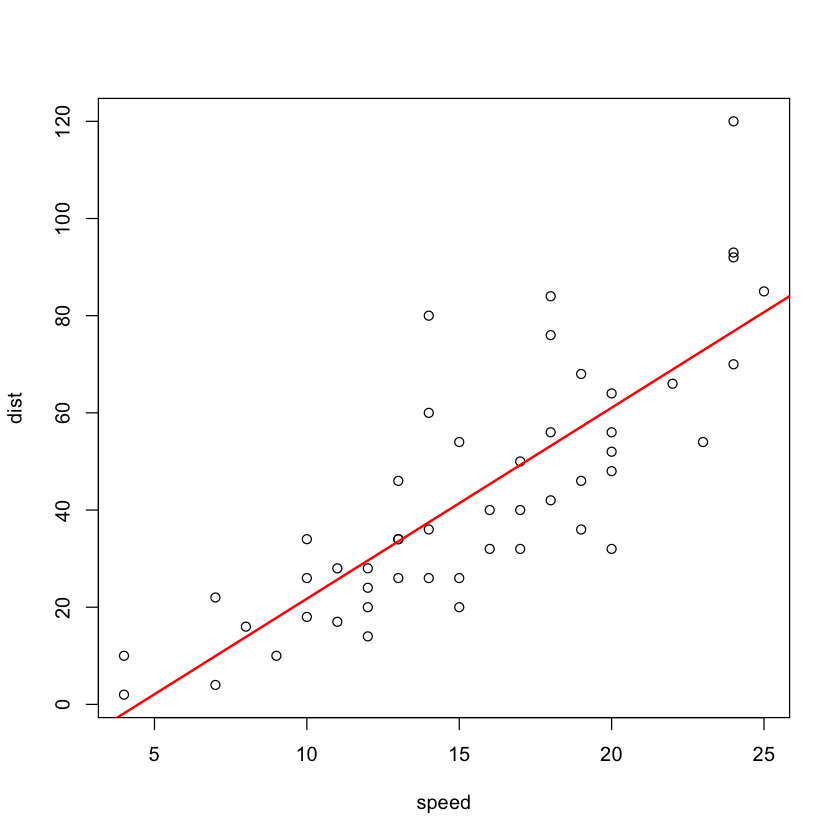

In [12]:
par(bg = 'white')

plot(dist ~ speed, cars)
abline(lm_model, col="red", lw=2)

## Bayesian linear model

### Define the data

In [55]:
model_data <- list(x=cars$speed, y=cars$dist, n=length(cars$dist))

### Fit the model

In [57]:
simple_car_model <- stan(file = 'slr.stan', data = model_data)

In [58]:
simple_car_model

Inference for Stan model: slr.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean   sd    2.5%     25%     50%     75%   97.5% n_eff Rhat
alpha  -17.64    0.20 7.10  -31.66  -22.46  -17.56  -12.91   -3.61  1260    1
beta     3.94    0.01 0.44    3.06    3.65    3.94    4.23    4.80  1215    1
sigma   15.83    0.04 1.68   12.96   14.66   15.67   16.88   19.49  1672    1
lp__  -159.51    0.04 1.28 -163.02 -160.05 -159.17 -158.59 -158.06  1220    1

Samples were drawn using NUTS(diag_e) at Wed Jan  5 22:37:11 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

### Frequentists Confidence Intervals

In [16]:
confint(lm(dist ~ speed, cars))

,2.5 %,97.5 %
(Intercept),-31.167850,-3.990340
speed,3.096964,4.767853


---
## Excercise 2 - a robust polynomial model

1. Copy slr.stan to rlr.stan (rlr stands for robust linear regression). In rlr.stan replace the distribution of y with the student t distribution with 4 degrees of freedom.

2. Fit the robust version and store it in m3. If all seems fine compare the results (i.e., point and interval estimates) with m2.

3. Make a copy of rlr.stan and call it rlr2.stan. In rlr2.stan implement this model:

$$ y = a0 + a1 * x + a2 * x^2 + epsilon $$


$$ epsilon \~ Student(0, 4, sigma)$$


but without an explicit error term (just like in Exercise 1). The expression x^2 will not work in Stan, you have to use the square function (i.e., a2 * square(x)). This is a special case of the general linear model called the second order polynomial. Note that you have to introduce an additional parameter (a2) and its (normal) prior. You now have a pretty flexible and robust regression model.

4. Fit the rlr2 model and store it in m4. If all seems fine compare the results to m2 and m3.

5. Using the point estimates (the 'mean' column in the model summary) from the rlr2 model calculate the expected value of dist. In the code below, you have to replace a0, a1, and a2 with the appropriate point estimates or calculate the point estimates yourself (by extracting the posterior samples and calculating the marginal means) and store them in variables a0, a1, and a2:

$$ Edist = a0 + a1 * cars$speed + a2 * cars$speed^2 $$

6. Plot dist vs speed and add the expected values for each observed value of speed like this:

$$ points(cars$speed, Edist, col = 'red', add = T) $$

----
### Define data and fit the model with student distribution

$$ y = a0 + a1 * x + epsilon $$

$$ epsilon - Student(0, 4, sigma)$$

In [17]:
model_data <- list(x=cars$speed, y=cars$dist, n=length(cars$dist), nu=4)
robust_car_model <- stan(file = 'rlr.stan', data = model_data)

In [18]:
# compare models

simple_car_model
robust_car_model

Inference for Stan model: slr.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean   sd    2.5%     25%     50%     75%   97.5% n_eff Rhat
alpha  -17.45    0.17 6.86  -31.15  -21.86  -17.45  -12.81   -4.19  1578    1
beta     3.93    0.01 0.42    3.10    3.65    3.92    4.21    4.73  1566    1
sigma   15.80    0.04 1.74   12.90   14.55   15.65   16.77   19.71  1950    1
lp__  -159.49    0.04 1.26 -162.82 -160.06 -159.16 -158.57 -158.06  1291    1

Samples were drawn using NUTS(diag_e) at Wed Jan  5 22:11:05 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

Inference for Stan model: rlr.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean   sd    2.5%     25%     50%     75%   97.5% n_eff Rhat
alpha  -15.92    0.15 5.73  -27.23  -19.59  -15.93  -12.23   -4.65  1505    1
beta     3.69    0.01 0.38    2.95    3.45    3.70    3.94    4.43  1480    1
sigma   12.06    0.04 1.58    9.23   10.93   11.97   13.06   15.43  1707    1
lp__  -155.49    0.03 1.19 -158.81 -156.01 -155.16 -154.62 -154.16  1277    1

Samples were drawn using NUTS(diag_e) at Wed Jan  5 22:11:09 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

---
### Define data and fit the model with student distribution and second order polynomial

$$ y = a0 + a1 * x + a2 * x^2 + epsilon $$

$$ epsilon - Student(0, 4, sigma)$$

In [19]:
# estimate data for priors. Sample from dataset to estimate coefficients

dist_sample = sample(cars$dist,20)
speed_sample = sample(cars$speed,20)

m_squared = lm(dist_sample ~ poly(speed_sample, 2), cars)
m_squared


Call:
lm(formula = dist_sample ~ poly(speed_sample, 2), data = cars)

Coefficients:
           (Intercept)  poly(speed_sample, 2)1  poly(speed_sample, 2)2  
                 39.65                  -12.24                   10.92  


In [20]:
# define data and fit model

model_rlr2_data <- list(x=cars$speed, y=cars$dist, n=length(cars$dist), nu=4)
robust_second_order_car_model <- stan(file = 'rlr2.stan', data = model_rlr2_data)

### Compare simple linear model with second order ploynomial model

In [21]:
print("----SIMPLE CAR MODEL-----------------------------------------------------")
simple_car_model
print("----ROBUST CAR MODEL-----------------------------------------------------")
robust_car_model
print("----ROBUST SECOND ORDER CAR MODEL ---------------------------------------")
robust_second_order_car_model

[1] "----SIMPLE CAR MODEL-----------------------------------------------------"


Inference for Stan model: slr.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean   sd    2.5%     25%     50%     75%   97.5% n_eff Rhat
alpha  -17.45    0.17 6.86  -31.15  -21.86  -17.45  -12.81   -4.19  1578    1
beta     3.93    0.01 0.42    3.10    3.65    3.92    4.21    4.73  1566    1
sigma   15.80    0.04 1.74   12.90   14.55   15.65   16.77   19.71  1950    1
lp__  -159.49    0.04 1.26 -162.82 -160.06 -159.16 -158.57 -158.06  1291    1

Samples were drawn using NUTS(diag_e) at Wed Jan  5 22:11:05 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

[1] "----ROBUST CAR MODEL-----------------------------------------------------"


Inference for Stan model: rlr.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean   sd    2.5%     25%     50%     75%   97.5% n_eff Rhat
alpha  -15.92    0.15 5.73  -27.23  -19.59  -15.93  -12.23   -4.65  1505    1
beta     3.69    0.01 0.38    2.95    3.45    3.70    3.94    4.43  1480    1
sigma   12.06    0.04 1.58    9.23   10.93   11.97   13.06   15.43  1707    1
lp__  -155.49    0.03 1.19 -158.81 -156.01 -155.16 -154.62 -154.16  1277    1

Samples were drawn using NUTS(diag_e) at Wed Jan  5 22:11:09 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

[1] "----ROBUST SECOND ORDER CAR MODEL ---------------------------------------"


Inference for Stan model: rlr2.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean    sd    2.5%     25%     50%     75%   97.5% n_eff Rhat
beta0    5.68    0.40 12.00  -17.24   -2.04    5.23   13.09   30.52   903 1.01
beta1    0.31    0.06  1.71   -3.14   -0.76    0.35    1.41    3.71   875 1.01
beta2    0.12    0.00  0.06    0.00    0.08    0.11    0.15    0.23   914 1.01
sigma   11.55    0.04  1.58    8.80   10.41   11.43   12.53   15.03  1613 1.00
lp__  -154.17    0.04  1.45 -157.81 -154.89 -153.82 -153.10 -152.37  1132 1.00

Samples were drawn using NUTS(diag_e) at Wed Jan  5 22:11:13 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

*We can see, that reslts are more reliable - intercept (speed) is, in second model, not negative when dist is 0.*

In [22]:
# Frequentist Confidence Intervals
confint(lm(dist ~ poly(speed, 2), cars))

,2.5 %,97.5 %
(Intercept),38.662361,47.29764
"poly(speed, 2)1",115.021940,176.08257
"poly(speed, 2)2",-7.534552,53.52608


----
### Calculate expected value of dist

To calculate expected value of dist we have to extract values of coefficient in equation for dist:

$$ Edist = beta0 + beta1 * speed + beta2 * speed^2 $$

To get those values we have to extract the posterior samples and calculate the marginal means.

In [23]:
# Read model into dataframe

robust_second_order_car_model_df = as.data.frame(robust_second_order_car_model)
head(robust_second_order_car_model_df)

,beta0,beta1,beta2,sigma,lp__
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18.647586,-2.07251239,0.2062227,10.612592,-153.9979
2,19.270041,-1.18882053,0.1551046,9.874519,-153.7770
3,8.150694,-0.56807106,0.1532496,12.300920,-153.0673
4,11.329022,-0.14849723,0.1244340,11.616254,-152.6165
5,17.037187,-1.33583006,0.1728763,12.334836,-153.1964
6,6.857788,0.08211344,0.1238299,11.511531,-152.2030


In [24]:
# calculate the mean value of each column (parameter) in dataframe - mean beta0, beta1 and beta2
parameters_list = apply(robust_second_order_car_model_df, 2, mean)
parameters_list

beta0        beta1        beta2        sigma         lp__ 
   5.6780209    0.3067084    0.1156127   11.5515440 -154.1721973

In [25]:
# get values of coeffs
beta0 = parameters_list[1]
beta1 = parameters_list[2]
beta2 = parameters_list[3]

In [26]:
# create equation for dist
e_dist = beta0 + beta1 * cars$speed + beta2 * cars$speed^2

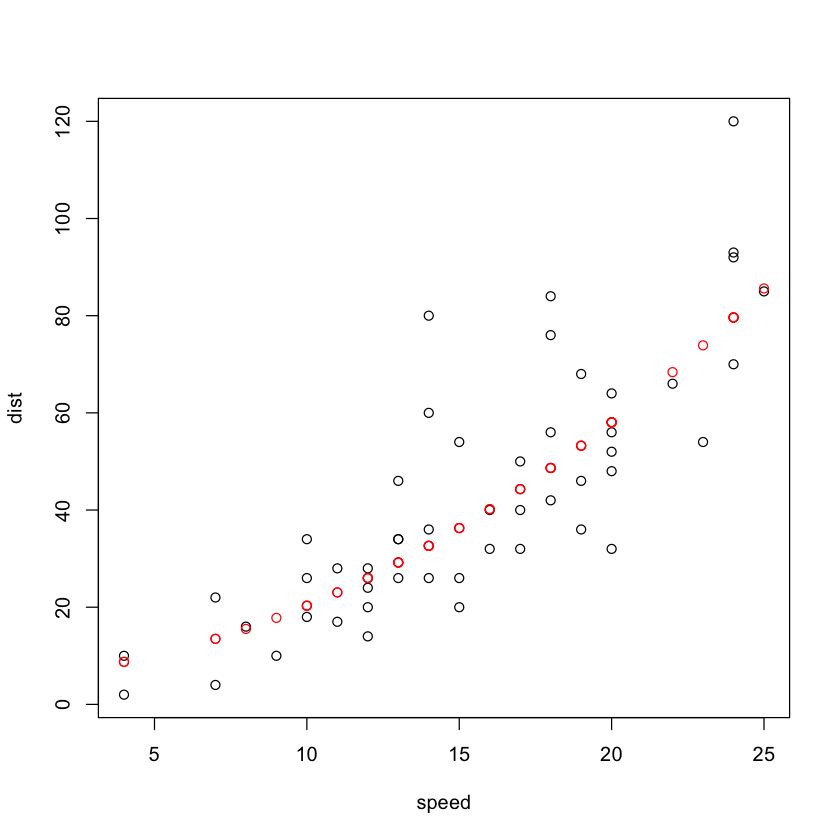

In [27]:
# plot the results
par(bg = 'white')

plot(dist ~ speed, cars)
points(cars$speed, e_dist, col = 'red')

#### Plot the comparison of first vs second order linear model

In [28]:
robust_car_model_df = as.data.frame(robust_car_model)
parameters_list_first_order_model = apply(robust_car_model_df, 2, mean)

# get values of coeffs
beta0 = parameters_list_first_order_model[1]
beta1 = parameters_list_first_order_model[2]

# create forst order equation for dist 
e_dist_1 = beta0 + beta1 * cars$speed

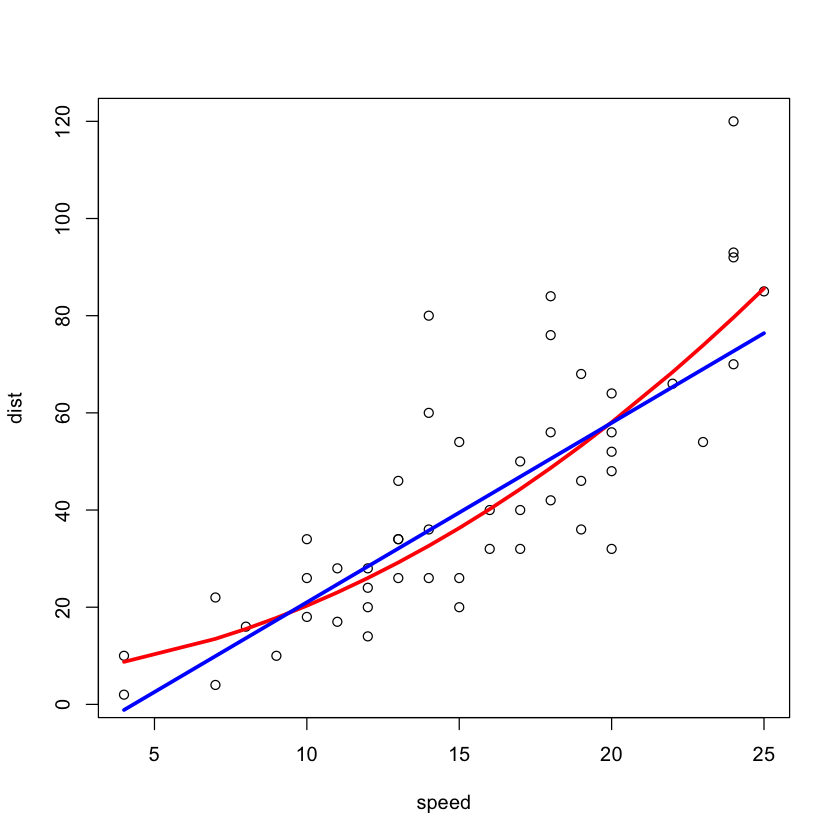

In [29]:
par(bg = 'white')

plot(dist ~ speed, cars)
lines(cars$speed, e_dist, col = 'red', lw=3)
lines(cars$speed, e_dist_1, col = 'blue', lw=3)

---
## Excercise 3 - Robust regression with possibly unequal variance

1. Make a copy of rlr2.stan and store it in rlr3.stan. The new model should use TWO, not necessarily different predictors, x and v, both of the same size. In this model, there is NO sigma parameter. The sigma parameter is replaced with ANOTHER model, which is kind of linear, but not really:

$$ epsilon - Student(0, 4, exp(s0 + s1 * v))$$

but, as in every other case, we do not use explicit error terms. You have to add the s0 and s1 parameters and attach some (relatively wide) normal priors to them.

2. Fit the model and compare the results to rlr2 and rlr1.

3. This is a fairly sophisticated, nonlinear model, so do not worry if you feel you don't understand what is going on. Try to figure out how the exp(s0 + s1 * v) part works. Here is a hint: imagine that, just like in the case of sigma, you knew that the expected value of y has to be positive. For instance, y could be reaction time. You can try to model the expected value of y like this:


$$ mu = a0 + a1 * x$$

$$y - normal(mu, sigma)$$

but if mu has to be positive and it can be arbitrarily close to 0 then log(mu) can have any value, negative or positive. This means that log(mu) may be a better candidate for something that is related to x by a linear equation, i.e., this may be a better idea:

$$log(mu) = a0 + a1 * x$$

and since exp(log(something)) = something (exp and log are inverse functions) we have that:

$$mu = exp(a0 + a1 * x)$$

In [30]:
# define data and fit model

model_rlr3_data <- list(x=cars$speed, v=cars$speed, y=cars$dist, n=length(cars$dist), nu=4)
robust_second_order_car_model_log <- stan(file = 'rlr3.stan', data = model_rlr3_data)

In [31]:
print("----ROBUST SECOND ORDER CAR MODEL ---------------------------------------")
robust_second_order_car_model
print("----ROBUST SECOND ORDER CAR MODEL WITH LOG ------------------------------")
robust_second_order_car_model_log

[1] "----ROBUST SECOND ORDER CAR MODEL ---------------------------------------"


Inference for Stan model: rlr2.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean    sd    2.5%     25%     50%     75%   97.5% n_eff Rhat
beta0    5.68    0.40 12.00  -17.24   -2.04    5.23   13.09   30.52   903 1.01
beta1    0.31    0.06  1.71   -3.14   -0.76    0.35    1.41    3.71   875 1.01
beta2    0.12    0.00  0.06    0.00    0.08    0.11    0.15    0.23   914 1.01
sigma   11.55    0.04  1.58    8.80   10.41   11.43   12.53   15.03  1613 1.00
lp__  -154.17    0.04  1.45 -157.81 -154.89 -153.82 -153.10 -152.37  1132 1.00

Samples were drawn using NUTS(diag_e) at Wed Jan  5 22:11:13 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

[1] "----ROBUST SECOND ORDER CAR MODEL WITH LOG ------------------------------"


Inference for Stan model: rlr3.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

             mean se_mean    sd    2.5%     25%     50%     75%   97.5% n_eff
beta0        1.47    0.26  8.92  -15.97   -4.29    1.33    6.96   19.62  1146
beta1        0.92    0.04  1.44   -1.90    0.02    0.93    1.87    3.77  1076
beta2        0.10    0.00  0.05   -0.01    0.06    0.10    0.13    0.20  1140
s0           1.56    0.01  0.44    0.70    1.26    1.55    1.85    2.44  1305
s1           0.05    0.00  0.03    0.00    0.04    0.06    0.07    0.11  1331
y_new[1]     6.78    0.19 10.26  -12.33    1.22    6.65   12.11   27.39  3000
y_new[2]     6.94    0.19 10.11  -12.19    1.38    6.60   12.23   28.19  2786
y_new[3]    12.58    0.18 11.11   -8.16    7.09   12.60   18.00   34.72  3756
y_new[4]    12.40    0.18 11.19   -9.57    6.93   12.43   17.85   33.17  3797
y_new[5]    14.83    0.18 11.08   -7.52    9.34   14.82   20.58   36.0

#### Plot the comparison between last two models

In [32]:
robust_second_order_car_model_log_df = as.data.frame(robust_second_order_car_model_log)
cars$fit = apply(robust_second_order_car_model_log_df[,grepl('y_new', names(robust_second_order_car_model_log_df))], 2, mean)


In [62]:
robust_second_order_car_model_log_df

beta0,beta1,beta2,s0,s1,y_new[1],y_new[2],y_new[3],y_new[4],y_new[5],⋯,y_new[42],y_new[43],y_new[44],y_new[45],y_new[46],y_new[47],y_new[48],y_new[49],y_new[50],lp__
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18.6749956,-1.5422439,0.18061549,1.696186,0.05560800,12.12562026,9.2731526,11.4936171,15.803192,19.957102,⋯,57.81370,78.29071,100.18866,82.46626,35.77740,84.646531,112.22326,116.30753,87.86491,-155.0344
13.7033341,-0.6442309,0.13335308,2.161933,0.02560751,13.95375764,24.4066717,28.7911730,12.658000,16.760436,⋯,50.97053,47.40442,41.90337,65.36099,60.31809,70.109937,50.46200,82.24007,77.46284,-155.1036
11.8180842,-0.6181533,0.13765401,1.821219,0.02654313,5.61623231,4.3483165,-0.4184553,-11.828787,11.652734,⋯,62.07325,67.78262,66.42892,74.27828,77.58990,107.130346,82.79651,82.11631,72.84201,-154.3510
-1.9742103,1.1715068,0.09283099,1.866824,0.02377464,-3.17156829,12.0539408,16.2083882,11.651314,11.245387,⋯,80.09954,43.10612,79.07887,67.02188,97.67872,86.032581,96.38612,76.82504,74.44786,-153.5635
-4.9584772,1.6053062,0.07904177,2.109605,0.02677372,38.58811654,12.2593376,21.1498622,-49.334273,2.784685,⋯,49.59255,46.77828,61.43204,81.43212,83.69549,64.824677,95.74073,86.00880,78.79590,-153.7776
-10.7277260,3.9539980,-0.02859165,2.034535,0.04082753,9.41017347,49.5456883,18.0180278,5.597909,24.652606,⋯,98.64177,97.88478,118.00032,56.00520,124.09401,81.568552,76.99479,81.70395,54.89249,-157.6986
-16.4703543,4.2812481,-0.02913626,1.941919,0.02999481,-32.07731228,-2.6916898,19.2256160,11.046236,44.935746,⋯,58.40416,52.67531,66.97657,71.04448,68.77272,67.194628,115.37445,68.11783,53.25221,-155.9640
6.7684428,-0.4157414,0.15395802,1.668176,0.05255208,-5.67849381,-5.3644841,17.0418808,1.067064,13.395691,⋯,79.95931,69.94137,42.48048,91.90296,83.94974,93.481619,62.20659,79.24342,92.64645,-153.2214
-0.6073471,0.8867392,0.09159133,1.429101,0.06163151,-0.07308006,-1.1098651,6.5104990,-4.955582,17.349874,⋯,56.32566,57.89298,76.36200,58.27503,75.71396,73.472004,55.17682,106.19834,70.92177,-153.8610


In [47]:
cars$ci025 = apply(robust_second_order_car_model_log_df[,grepl('y_new', names(robust_second_order_car_model_log_df))], 2, quantile, probs=c(0.025))
cars$ci975 = apply(robust_second_order_car_model_log_df[,grepl('y_new', names(robust_second_order_car_model_log_df))], 2, quantile, probs=c(0.975))
# a = quantile(robust_second_order_car_model_log_df$'y_new[1]', probs = c(0.025,0.975))

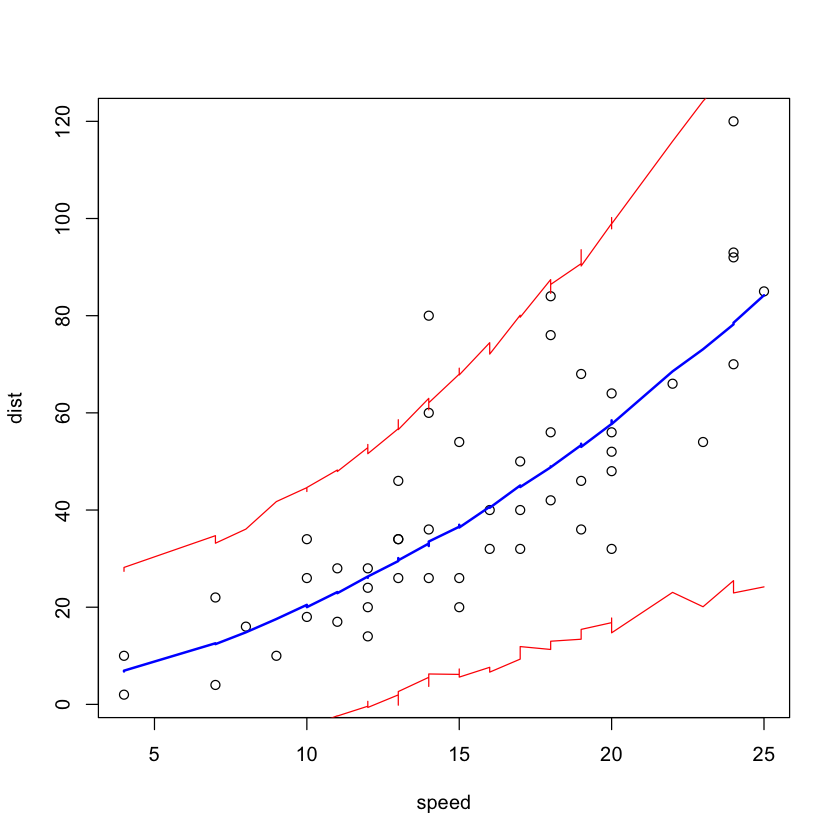

In [52]:
par(bg = 'white')

plot(dist ~ speed, cars)
lines(fit ~ speed, cars, col = "blue", lw=2)
lines(ci025 ~ speed, cars, col = "red", lw=1)
lines(ci975 ~ speed, cars, col = "red", lw=1)

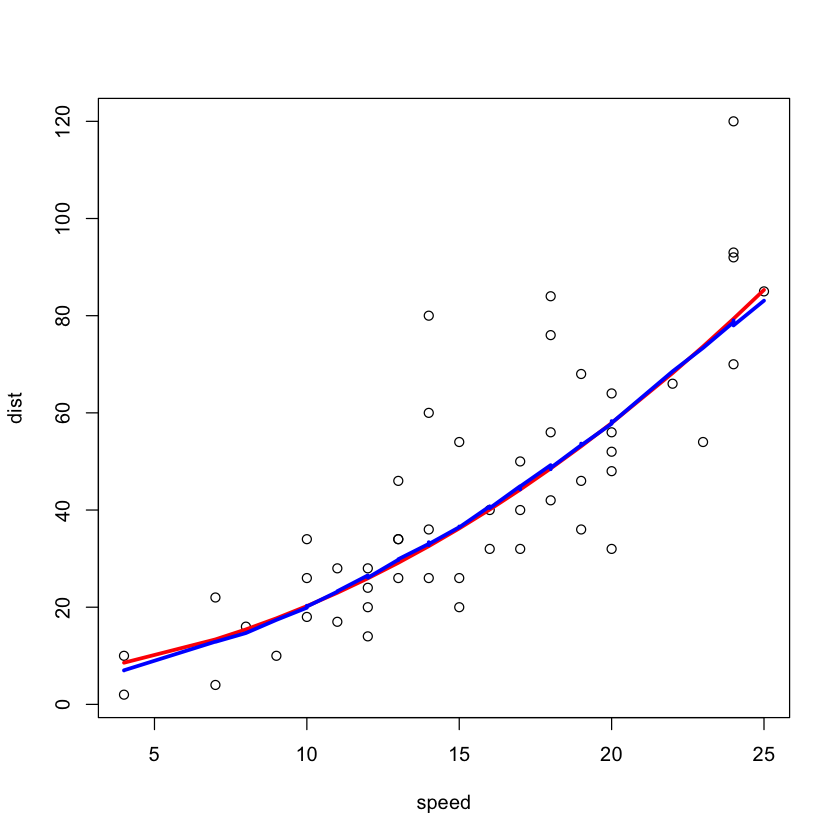

In [131]:
par(bg = 'white')

plot(dist ~ speed, cars)
lines(cars$speed, e_dist, col = 'red', lw=3)
lines(fit ~ speed, cars, col = "blue", lw=3)